# Knocking out the MVA pathway

The MVA pathway is endogenous to the yeast model. In order to knock out this pathway completely to prevent any possible formation of lycopene, we knocked out reactions specific to lycopene synthesis and not involved with any metabolic processes. (R)-5-diphosphomevalonic acid is a key intermediate within lycopene production that is converted into IPP. We knocked out reactions r_0739 and r_0904 which involve converting (R)-5-diphosphomevalonic acid into IPP, which shuts down lycopene synthesis. IPP is specific to secondary metabolite synthesis and plays no role in metabolism.  

###  Turning off (R)-5-diphosphomevalonic acid conversion to IPP is key to turn off lycopene production
All reactions in the lycopene synthesis path were investigated to determine reactions that would turn off lycopene production but have no effect on metabolism. The prevention of reactions involving (R)-5-diphosphomevalonic acid seemed most promising. This intermediate in lycopene synthesis is only involved in two reactions r_0739 and r_0904 (unlike other intermediates in lycopene synthesis which are involved in many reactions). Reaction r_0739 involves converting (R)-5-diphosphomevalonic acid into IPP and CO2 using ATP. Reaction r_0904 apparently only involves burning ATP (look at the stoichiometry in the last cell of this section below).

for m in model.metabolites.query("C6H10O10P2", 'formula'):
       print(m, m.name)
<br />s_0018[c] (R)-5-diphosphomevalonic acid [cytoplasm]

**model.metabolites.get_by_id('s_0018[c]')**
<br />Name	(R)-5-diphosphomevalonic acid [cytoplasm]
<br />In 2 reaction(s)	r_0904, r_0739

**model.reactions.get_by_id('r_0739')**
<br />mevalonate pyrophoshate decarboxylase
<br />s_0018[c] + s_0434[c] --> IPP + s_0394[c] + s_0456[c] + s_1322[c]
<br />(R)-5-diphosphomevalonic acid [cytoplasm] + ATP [cytoplasm] --> isopentenyl diphosphate [cytoplasm] + ADP [cytoplasm] + carbon dioxide [cytoplasm] + phosphate [cytoplasm]

**model.reactions.get_by_id('r_0904')**
<br /> s_0019[c] + s_0434[c] --> s_0018[c] + s_0394[c]
<br /> (R)-5-phosphomevalonic acid [cytoplasm] + ATP [cytoplasm] --> (R)-5-diphosphomevalonic acid [cytoplasm] + ADP [cytoplasm]

### Prevention of IPP formation should shut down only lycopene production and not metabolism
Listed below are all reactions that IPP is involved with in the model. IPP synthesis occurs only when (R)-5-diphosphomevalonic acid [cytoplasm] + ATP [cytoplasm] are used as substrates. All reactions in the model that use IPP as a substrate result in the synthesis of intermediates of secondary metabolite terpenes, not with metabolism. Thus, blocking the formation of IPP should not affect cellular metabolism but only prevent the formation of lycopene and secondary metabolites. We should see no lycopene production and no change in biomass formation when IPP formation is prevented by blocking the two reactions in the model that result in the synthesis of (R)-5-diphosphomevalonic acid.

model.metabolites.get_by_id('IPP')
r_0667, r_0462, r_0373, r_0739, r_0461, r_1182, r_0355

model.reactions.get_by_id('r_0667')
isopentenyl diphosphate [cytoplasm] <=> prenyl diphosphate(3-) [cytoplasm]

model.reactions.get_by_id('r_0462')
isopentenyl diphosphate [cytoplasm] + geranyl diphosphate [cytoplasm] --> farnesyl diphosphate [cytoplasm] + diphosphate [cytoplasm]

model.reactions.get_by_id('r_0739')
(R)-5-diphosphomevalonic acid [cytoplasm] + ATP [cytoplasm] --> isopentenyl diphosphate [cytoplasm] + ADP [cytoplasm] + carbon dioxide [cytoplasm] + phosphate [cytoplasm]

model.reactions.get_by_id('r_0373')
isopentenyl diphosphate [cytoplasm] + farnesyl diphosphate [cytoplasm] --> geranylgeranyl diphosphate [cytoplasm] + diphosphate [cytoplasm]

model.reactions.get_by_id('r_1182')
isopentenyl diphosphate [cytoplasm] <=> isopentenyl diphosphate [mitochondrion]

model.reactions.get_by_id('r_0461')
isopentenyl diphosphate [cytoplasm] + geranylgeranyl diphosphate [cytoplasm] --> diphosphate [cytoplasm] + pentaprenyl diphosphate [cytoplasm]

model.reactions.get_by_id('r_0355')
isopentenyl diphosphate [cytoplasm] + prenyl diphosphate(3-) [cytoplasm] --> diphosphate [cytoplasm] + geranyl diphosphate [cytoplasm]

**Loading the GSM with no modifications**

In [1]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite, Model

model = read_sbml_model('models/yeast-GEM.xml')

**Defining metabolites to be incorporated in lycopene pathway**

As well as renaming metabolite IDs for convenience

In [2]:
ipp = model.metabolites.get_by_id('s_0943[c]') # IPP already in model
ipp.id = "IPP"

In [3]:
dmapp = model.metabolites.get_by_id('s_1376[c]') # DMAPP is denoted as "prenyl diphosphate (3-)" in the model
dmapp.id = "DMAPP"

In [4]:
gpp = model.metabolites.get_by_id('s_0745[c]') # Geranyl-PP already in model
gpp.id = "GPP"

In [5]:
farnpp = model.metabolites.get_by_id('s_0190[c]') # Farnesyl-PP already in model
farnpp.id = "FPP"

In [6]:
ggpp = model.metabolites.get_by_id('s_0189[c]') # GGPP is already found naturally in model as metabolite s_0189[c]
ggpp.id = "GGPP"

In [7]:
phytoene = Metabolite(id='phytoene', compartment = 'c', name='Phytoene', formula = 'C40H64')

In [8]:
lycopene = Metabolite(id='lycopene', compartment = 'c', name='Lycopene', formula='C40H56')

In [9]:
# Readily available variables for our reactions

NAD = model.metabolites.get_by_id('s_1198[c]')
NAD.id = "NAD_c"

NADH = model.metabolites.get_by_id('s_1203[c]')
NADH.id = "NADH_c"

FAD = model.metabolites.get_by_id('s_0687[c]') 
FAD.id = "FAD_c"

FADH2 = model.metabolites.get_by_id('s_0689[c]') 
FADH2.id = "FADH2_c"

O2 = model.metabolites.get_by_id('s_1275[c]')
O2.id = "O2_c"

H2O = model.metabolites.get_by_id('s_0803[c]')
H2O.id = "H2O_c"

diphosphate = model.metabolites.get_by_id('s_0633[c]')
diphosphate.id = "PPi_c"

In [10]:
# To fix potential problems with indexes the following command is used from the cobra.py package documentation
model.repair()

**Defining reactions of lycopene pathway**

Renaming reactions for convience

In [11]:
isopentenyl_diphosphate_delta_isomerase = model.reactions.get_by_id('r_0667')
isopentenyl_diphosphate_delta_isomerase.id = "IDI"

In [12]:
gp_synthase = model.reactions.get_by_id('r_0355')
gp_synthase.id = "GP_synth"

In [13]:
farnpp_synthase = model.reactions.get_by_id('r_0462')
farnpp_synthase.id = "FPP_synth"

In [14]:
ggpp_synthase = model.reactions.get_by_id('r_0373')
ggpp_synthase.id = "CrtE"

In [15]:
phytoene_synthase = Reaction('CrtB')

In [16]:
phytoene_desaturase = Reaction('CrtI')

**Adding metabolites to heterologous reactions**

In [17]:
phytoene_synthase.add_metabolites(({ggpp: -2,
                                    diphosphate:2,
                                    phytoene: 1}))

In [18]:
phytoene_desaturase.add_metabolites(({phytoene: -1,
                                      FAD:-4,
                                      FADH2:4,
                                      lycopene: 1}))

In [19]:
model.add_reactions([phytoene_synthase])
model.add_reactions([phytoene_desaturase])

**Updating model with boundaries for introduced reactions**

In [20]:
model.add_boundary(model.metabolites.lycopene, type = 'demand');

In [21]:
medium_glc_ex = model.reactions.get_by_id('r_1714')
medium = model.medium
with model:
    model.objective = model.reactions.CrtI
    lycopene_production = model.optimize().objective_value
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print('Maximum theoretical productivity of lycopene =', lycopene_production, 'mmol/(gDW*h^-1)')
    
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = lycopene_production / (-1*glc_uptake_flux)
    print('Maximum theoretical yield =', max_yield, 'mmol-lyco/mmol-glc\n')
    
    medium[medium_glc_ex.id] = 700
    model.medium = medium

    lycopene_production = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = lycopene_production / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print('Maximum theoretical productivity of lycopene =', lycopene_production, 'mmol/(gDW*h*^-1)')
    print('Maximum theoretical yield =', max_yield, 'mmol-lyco/mmol-glc\n')

At glucose concentration = 1.0:
Maximum theoretical productivity of lycopene = 0.0871195699738864 mmol/(gDW*h^-1)
Maximum theoretical yield = 0.0871195699738864 mmol-lyco/mmol-glc

At glucose concentration = 700:
Maximum theoretical productivity of lycopene = 25.82544091710759 mmol/(gDW*h*^-1)
Maximum theoretical yield = 0.040149082999580775 mmol-lyco/mmol-glc



In [22]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [23]:
# Renaming IDs for exchange reactions needed
glc_exchange = model.reactions.r_1714
o2_exchange = model.reactions.r_1992
growth = model.reactions.r_2111

In [24]:
medium = model.medium

#Amping glucose levels to 700.0
medium['r_1714'] = 700
model.reactions.r_1714.bounds = -700, 0

In [25]:
ppp_biomass = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=growth)
ppp_biomass

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.0,0.0,18.330828,0.0,0.0,-700.000000
1,r_1714,0.0,0.0,0.0,18.777738,0.0,0.0,-663.159690
2,r_1714,0.0,0.0,0.0,19.221981,0.0,0.0,-626.319379
3,r_1714,0.0,0.0,0.0,19.666224,0.0,0.0,-589.479069
4,r_1714,0.0,0.0,0.0,19.463695,0.0,0.0,-552.638759
5,r_1714,0.0,0.0,0.0,18.716523,0.0,0.0,-515.798448
6,r_1714,0.0,0.0,0.0,17.956257,0.0,0.0,-478.958138
7,r_1714,0.0,0.0,0.0,17.195990,0.0,0.0,-442.117828
8,r_1714,0.0,0.0,0.0,16.435724,0.0,0.0,-405.277518
9,r_1714,0.0,0.0,0.0,15.675457,0.0,0.0,-368.437207


<AxesSubplot:xlabel='Glucose uptake [-mmol/gDW/h]', ylabel='Biomass objective'>

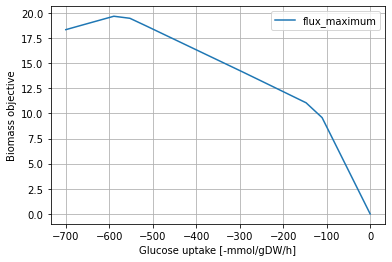

In [26]:
ppp_biomass.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Biomass objective", grid = True)

In [27]:
ppp_lycopene = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=model.reactions.CrtI)
ppp_lycopene

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.000000e+00,NaN,25.825441,9.100393e-01,NaN,-700.000000
1,r_1714,0.0,0.000000e+00,NaN,25.825441,9.605945e-01,NaN,-663.159690
2,r_1714,0.0,0.000000e+00,NaN,25.803411,1.016229e+00,NaN,-626.319379
3,r_1714,0.0,0.000000e+00,NaN,25.594115,1.070982e+00,NaN,-589.479069
4,r_1714,0.0,0.000000e+00,NaN,25.345194,1.131266e+00,NaN,-552.638759
5,r_1714,0.0,0.000000e+00,NaN,25.096273,1.200161e+00,NaN,-515.798448
6,r_1714,0.0,0.000000e+00,NaN,24.740275,1.274141e+00,NaN,-478.958138
7,r_1714,0.0,0.000000e+00,NaN,24.301700,1.355842e+00,NaN,-442.117828
8,r_1714,0.0,0.000000e+00,NaN,23.732702,1.444459e+00,NaN,-405.277518
9,r_1714,0.0,0.000000e+00,NaN,23.138503,1.549110e+00,NaN,-368.437207


<AxesSubplot:xlabel='Glucose uptake [-mmol/gDW/h]', ylabel='Lycopene objective'>

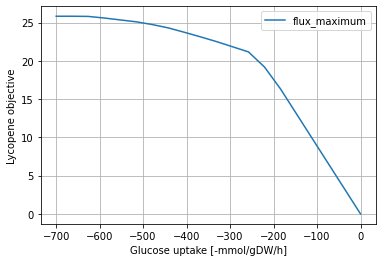

In [28]:
ppp_lycopene.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Lycopene objective", grid=True)

In [29]:
from cobra.io import write_sbml_model
write_sbml_model(model,"models/yeast_lyco_MVA.xml")

**Turning off the conversion of (R)-5-diphosphomevalonic acid into IPP**

In [30]:
model.reactions.r_0739.lower_bound = 0
model.reactions.r_0739.upper_bound = 0

In [31]:
medium_glc_ex = model.reactions.get_by_id('r_1714')
medium = model.medium
medium['r_1714'] = 1
model.reactions.r_1714.bounds = -700, 0
with model:
    model.objective = model.reactions.CrtI
    lycopene_production = model.optimize().objective_value
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print('Maximum theoretical productivity of lycopene =', lycopene_production, 'mmol/(gDW*h^-1)')
    
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = lycopene_production / (-1*glc_uptake_flux)
    print('Maximum theoretical yield =', max_yield, 'mmol-lyco/mmol-glc\n')
    
    medium[medium_glc_ex.id] = 700
    model.medium = medium

    lycopene_production = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = lycopene_production / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print('Maximum theoretical productivity of lycopene =', lycopene_production, 'mmol/(gDW*h*^-1)')
    print('Maximum theoretical yield =', max_yield, 'mmol-lyco/mmol-glc\n')

At glucose concentration = 1:
Maximum theoretical productivity of lycopene = 2.7600391519181846e-19 mmol/(gDW*h^-1)
Maximum theoretical yield = 8.09296051516735e-18 mmol-lyco/mmol-glc

At glucose concentration = 700:
Maximum theoretical productivity of lycopene = 2.7600391519181846e-19 mmol/(gDW*h*^-1)
Maximum theoretical yield = 8.09296051516735e-18 mmol-lyco/mmol-glc



<AxesSubplot:xlabel='Glucose uptake [-mmol/gDW/h]', ylabel='Biomass objective'>

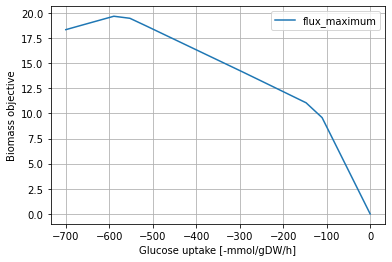

In [32]:
ppp_biomass.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Biomass objective", grid = True)

In [33]:
ppp_lycopene = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=model.reactions.CrtI)
ppp_lycopene

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.0,NaN,0.0,1.081362e-20,NaN,-700.000000
1,r_1714,0.0,0.0,NaN,0.0,5.343902e-23,NaN,-663.159690
2,r_1714,0.0,0.0,NaN,0.0,6.218099e-23,NaN,-626.319379
3,r_1714,0.0,0.0,NaN,0.0,7.878570e-23,NaN,-589.479069
4,r_1714,0.0,0.0,NaN,0.0,1.672785e-22,NaN,-552.638759
5,r_1714,0.0,0.0,NaN,0.0,0.000000e+00,NaN,-515.798448
6,r_1714,0.0,0.0,NaN,0.0,5.915320e-33,NaN,-478.958138
7,r_1714,0.0,0.0,NaN,0.0,2.396333e-32,NaN,-442.117828
8,r_1714,0.0,0.0,NaN,0.0,0.000000e+00,NaN,-405.277518
9,r_1714,0.0,0.0,NaN,0.0,0.000000e+00,NaN,-368.437207


**Lycopene production completely off**

<AxesSubplot:xlabel='Glucose uptake [-mmol/gDW/h]', ylabel='Lycopene objective'>

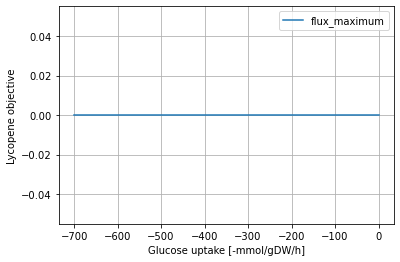

In [34]:
ppp_lycopene.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Lycopene objective", grid=True)

Can observe that we are able to turn off the lycopene production completely.

In [35]:
write_sbml_model(model,"models/yeast_lyco_NO_MVA.xml")

# Model containing only the MEP pathway

It would be interesting to incorporate the MEP pathway into the yeast model because the MEP pathway produces both IPP and DMAPP, unlike the MVA pathwat which yields only IPP and requires an isomerase (IDI) to generate DMAPP.

We load the model that contains the heterologous reactions and metabolites stemming from DMAPP till lycopene. The loaded model contains the MVA path (since it is endogenous to *S. cerevisiae*) but in this file we want to determine the lycopene production capacity of solely the MEP path. To do so, the lower and upper bounds of the reaction r_0739, (R)-5-diphosphomevalonic acid conversion to IPP, is set to zero.

In [36]:
from cobra import Reaction, Metabolite, Model

model = read_sbml_model('models/yeast_lyco_MVA.xml')

**Setting the bounds of the reaction (R)-5-diphosphomevalonic acid conversion to IPP to zero**

In [37]:
model.reactions.r_0739.lower_bound = 0;
model.reactions.r_0739.upper_bound = 0

**Defining endogenous metabolites used in the MEP path**

In [38]:
pyruvate = model.metabolites.get_by_id('s_1399[c]')
pyruvate.id = "pyruvate_c"
ppi= model.metabolites.get_by_id('PPi_c')
ppi.id = "ppi_c"
g3p = model.metabolites.get_by_id('s_0764[c]')
g3p.id = "g3p_c"
ctp = model.metabolites.get_by_id('s_0539[c]')
ctp.id = "ctp_c"
atp = model.metabolites.get_by_id('s_0434[c]')
atp.id = "atp_c"
adp = atp = model.metabolites.get_by_id('s_0394[c]')
adp.id = "adp_c"
cmp = model.metabolites.get_by_id('s_0526[c]')
cmp.id = "cmp_c"
co2 = model.metabolites.get_by_id('s_0456[c]')
co2.id = "co2_c"
nadp = model.metabolites.get_by_id('s_1207[c]')
nadp.id = "nadp_c"
nadph = model.metabolites.get_by_id('s_1212[c]')
nadph.id = "nadph_c"
h = model.metabolites.get_by_id('s_0794[c]')
h.id = "h_c"
h2o = model.metabolites.get_by_id('H2O_c')
h2o.id = "h2o_c"
dmapp = model.metabolites.get_by_id('DMAPP')
dmapp.id = "dmapp_c"
ipp = model.metabolites.get_by_id('IPP')
ipp.id = "ipp_c"

**Defining heterologous metabolite intermediates generated in the MEP pathway**  

In [39]:
dxp = Metabolite(id='dxp', compartment = 'c', name='1-Deoxy-D-xylulose 5-phosphate', formula = 'C5H11O7P')
mep = Metabolite(id='mep', compartment = 'c', name='2-C-Methyl-D-erythritol 4-phosphate', formula='C5H13O7P')
dme = Metabolite(id='dme', compartment = 'c', name='4-diphosphocytidyl-2-C-methyl-D-erythritol', formula='C14H23N3O14P2')
pdme = Metabolite(id='pdme', compartment = 'c', name='2-phospho-4-diphosphocytidyl-2-C-methyl-D-erythritol', formula='C14H22N3O17P3')
mec = Metabolite(id='mec', compartment = 'c', name='2-C-methyl-D-erythritol 2,4-cyclodiphosphate', formula='C5H10O9P2')
hmbd = Metabolite(id='hmbd', compartment = 'c', name='1-hydroxy-2-methyl-2-(E)-butenyl 4-diphosphate', formula='C5H9O8P2')
fldr = Metabolite(id='fldr', compartment = 'c', name='reduced_flavodoxin', formula='C17H21N4O9P')
fmn = Metabolite(id='fmn', compartment = 'c', name='oxidized_flavodoxin', formula='C17H19N4O9P')

In total there are 7 enzymes in the MEP pathway, 6 of which catalyze one reaction each (as defined in code cell above: dxp, mep, dme, pdme, and mec). The 7th enzyme catalyzes two reactions, catalyzing the final step of metylerythritol (mep) into IPP and DMAPP.

The last two reactions of the MEP pathway in bacteria require a flavodoxin-NADP(+) reductase system in order to generate IPP and DMAPP. Flavodoxin, an electron carrier, is dependent on becoming reduced by NADPH prior to its activity reducing compounds in the last two reactions of the MEP pathway. The reduced form of flavodoxin is defined as "fldr" and the oxidized form of flavodoxin is defined as "fmn".

**Introducing MEP pathway reactions**

In [40]:
dxp_synthase = Reaction('Ec-dxs')
dx_reductoisomerase = Reaction('dxr')
cytidyltransferase = Reaction('ispD')
cm_kinase = Reaction('ispE')
mec_synthase = Reaction('ispF')
hmbpp_synthase = Reaction('ispG')
hmbpp_reductase1 = Reaction('ispH1')
hmbpp_reductase2 = Reaction('ispH2')
flavodoxin_reduction = Reaction('flav')

In [41]:
flavodoxin_reduction.add_metabolites(({nadph: -2,
                             fmn: -1,
                             fldr: 1,
                             nadp: 2
                             }))

In [42]:
dxp_synthase.add_metabolites(({pyruvate: -1,
                             g3p: -1,
                             h: -1,
                             dxp: 1,
                             co2: 1
                             }))

In [43]:
dx_reductoisomerase.add_metabolites(({dxp: -1,
                               nadph: -1,
                               h: -1,
                               mep: 1,
                               nadp: 1
                              }))

In [44]:
cytidyltransferase.add_metabolites(({mep: -1,
                                     ctp: -1,
                                     h: -1,
                                    dme: 1,
                                    ppi: 1
                                   }))

In [45]:
cm_kinase.add_metabolites(({dme: -1,
                            atp: -1,
                            h: 1,
                            pdme: 1,
                            adp: 1
                            }))

In [46]:
mec_synthase.add_metabolites(({pdme: -1,
                               cmp: 1,
                               mec: 1
                                   }))

In [47]:
hmbpp_synthase.add_metabolites(({mec: -1,
                             fldr: -2,
                             h2o: 1,
                             fmn: 2,
                             hmbd: 1
                             }))

In [48]:
hmbpp_reductase1.add_metabolites(({hmbd: -1,
                             fldr: -2,
                             h2o: 1,
                             dmapp: 1,
                             fmn: 2
                             }))

In [49]:
hmbpp_reductase2.add_metabolites(({hmbd: -1,
                             fldr: -2,
                             h2o: 1,
                             dmapp: 1,
                             fmn: 2
                             }))

In [50]:
model.add_reactions([dxp_synthase])
model.add_reactions([dx_reductoisomerase])
model.add_reactions([cytidyltransferase])
model.add_reactions([cm_kinase])
model.add_reactions([mec_synthase])
model.add_reactions([hmbpp_synthase])
model.add_reactions([hmbpp_reductase1])
model.add_reactions([hmbpp_reductase2])
model.add_reactions([flavodoxin_reduction])

### **Understanding the effects of increased glucose levels on lycopene production**

In [51]:
medium_glc_ex = model.reactions.get_by_id('r_1714')
medium = model.medium
with model:
    model.objective = model.reactions.CrtI
    lycopene_production = model.optimize().objective_value
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print('Maximum theoretical productivity of lycopene =', lycopene_production, 'mmol/(gDW*h^-1)')
    
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = lycopene_production / (-1*glc_uptake_flux)
    print('Maximum theoretical yield =', max_yield, 'mmol-lyco/mmol-glc\n')
    
    medium[medium_glc_ex.id] = 700
    model.medium = medium

    lycopene_production = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = lycopene_production / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print('Maximum theoretical productivity of lycopene =', lycopene_production, 'mmol/(gDW*h*^-1)')
    print('Maximum theoretical yield =', max_yield, 'mmol-lyco/mmol-glc\n')

At glucose concentration = 700.0:
Maximum theoretical productivity of lycopene = 22.181112866013216 mmol/(gDW*h^-1)
Maximum theoretical yield = 0.06182790438328062 mmol-lyco/mmol-glc

At glucose concentration = 700:
Maximum theoretical productivity of lycopene = 22.181112866013216 mmol/(gDW*h*^-1)
Maximum theoretical yield = 0.06182790438328062 mmol-lyco/mmol-glc



In [52]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [53]:
# Renaming IDs for exchange reactions needed
glc_exchange = model.reactions.r_1714
o2_exchange = model.reactions.r_1992
growth = model.reactions.r_2111

In [54]:
medium = model.medium

#Amping glucose levels to 700.0
medium['r_1714'] = 700
model.reactions.r_1714.bounds = -700, 0

In [55]:
ppp_biomass = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=growth)
ppp_biomass

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.0,0.0,18.990886,0.0,0.0,-700.000000
1,r_1714,0.0,0.0,0.0,19.452775,0.0,0.0,-663.159690
2,r_1714,0.0,0.0,0.0,19.912989,0.0,0.0,-626.319379
3,r_1714,0.0,0.0,0.0,20.373202,0.0,0.0,-589.479069
4,r_1714,0.0,0.0,0.0,20.093125,0.0,0.0,-552.638759
5,r_1714,0.0,0.0,0.0,19.370882,0.0,0.0,-515.798448
6,r_1714,0.0,0.0,0.0,18.584036,0.0,0.0,-478.958138
7,r_1714,0.0,0.0,0.0,17.797189,0.0,0.0,-442.117828
8,r_1714,0.0,0.0,0.0,17.010343,0.0,0.0,-405.277518
9,r_1714,0.0,0.0,0.0,16.223496,0.0,0.0,-368.437207


<AxesSubplot:xlabel='Glucose uptake [-mmol/gDW/h]', ylabel='Biomass objective'>

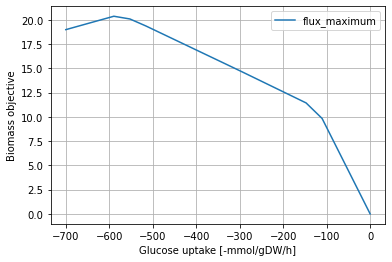

In [56]:
ppp_biomass.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Biomass objective", grid = True)

Can see that biomass is maximized when glucose uptake is at 578 mmol/gDW/h

In [57]:
ppp_lycopene = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=model.reactions.CrtI)
ppp_lycopene

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.000000e+00,NaN,21.939276,7.730983e-01,NaN,-700.000000
1,r_1714,0.0,0.000000e+00,NaN,21.970346,8.172017e-01,NaN,-663.159690
2,r_1714,0.0,0.000000e+00,NaN,22.001416,8.664934e-01,NaN,-626.319379
3,r_1714,0.0,0.000000e+00,NaN,22.032486,9.219462e-01,NaN,-589.479069
4,r_1714,0.0,0.000000e+00,NaN,22.063556,9.847923e-01,NaN,-552.638759
5,r_1714,0.0,0.000000e+00,NaN,22.094627,1.056616e+00,NaN,-515.798448
6,r_1714,0.0,0.000000e+00,NaN,22.125697,1.139488e+00,NaN,-478.958138
7,r_1714,0.0,0.000000e+00,NaN,22.156767,1.236172e+00,NaN,-442.117828
8,r_1714,0.0,0.000000e+00,NaN,22.181113,1.350023e+00,NaN,-405.277518
9,r_1714,0.0,0.000000e+00,NaN,22.181113,1.485013e+00,NaN,-368.437207


<AxesSubplot:xlabel='Glucose uptake [-mmol/gDW/h]', ylabel='Lycopene objective'>

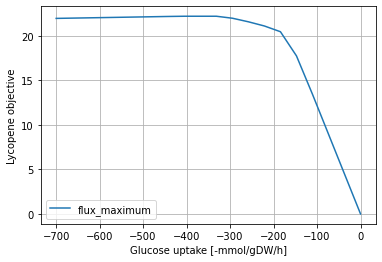

In [58]:
ppp_lycopene.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Lycopene objective", grid=True)

Lycopene production is maximized at around a glucose uptake of 300 mmol/gDW/h

In [59]:
ppp_lyco_vs_o2 = production_envelope(model,
                    reactions=[o2_exchange],
                    objective=model.reactions.CrtI)
ppp_lyco_vs_o2

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1992
0,r_1714,0.0,0.0,NaN,10.984338,0.515610,NaN,-1000.000000
1,r_1714,0.0,0.0,NaN,12.228823,0.563835,NaN,-947.368421
2,r_1714,0.0,0.0,NaN,13.320646,0.634478,NaN,-894.736842
3,r_1714,0.0,0.0,NaN,14.353822,0.698212,NaN,-842.105263
4,r_1714,0.0,0.0,NaN,15.356267,0.762589,NaN,-789.473684
5,r_1714,0.0,0.0,NaN,16.314669,0.831405,NaN,-736.842105
6,r_1714,0.0,0.0,NaN,17.273070,0.903922,NaN,-684.210526
7,r_1714,0.0,0.0,NaN,18.049964,0.970880,NaN,-631.578947
8,r_1714,0.0,0.0,NaN,18.744331,1.034856,NaN,-578.947368
9,r_1714,0.0,0.0,NaN,19.418749,1.111630,NaN,-526.315789


<AxesSubplot:xlabel='Oxygen uptake rate', ylabel='Lycopene objective'>

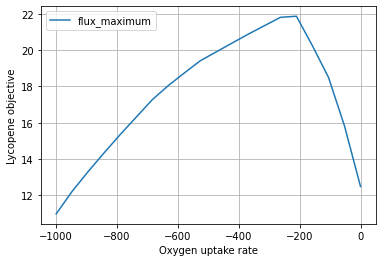

In [60]:
ppp_lyco_vs_o2.plot(x='r_1992', y='flux_maximum', xlabel="Oxygen uptake rate", ylabel="Lycopene objective", grid=True)

In [61]:
ppp_o2 = production_envelope(model,
                            reactions=[o2_exchange],
                            objective=growth)
ppp_o2

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1992
0,r_1714,0.0,0.0,0.0,9.531888,0.0,0.0,-1000.000000
1,r_1714,0.0,0.0,0.0,10.598988,0.0,0.0,-947.368421
2,r_1714,0.0,0.0,0.0,11.666088,0.0,0.0,-894.736842
3,r_1714,0.0,0.0,0.0,12.733188,0.0,0.0,-842.105263
4,r_1714,0.0,0.0,0.0,13.800288,0.0,0.0,-789.473684
5,r_1714,0.0,0.0,0.0,14.867389,0.0,0.0,-736.842105
6,r_1714,0.0,0.0,0.0,15.934489,0.0,0.0,-684.210526
7,r_1714,0.0,0.0,0.0,17.001589,0.0,0.0,-631.578947
8,r_1714,0.0,0.0,0.0,18.068689,0.0,0.0,-578.947368
9,r_1714,0.0,0.0,0.0,19.135789,0.0,0.0,-526.315789


In [62]:
max_biomass_glc = ppp_biomass['flux_maximum'].max()
max_biomass_o2 = ppp_o2['flux_maximum'].max()
max_lycopene_glc = ppp_lycopene['flux_maximum'].max()
max_lycopene_o2 = ppp_lyco_vs_o2['flux_maximum'].max()
max_list = [max_biomass_glc, max_biomass_o2, max_lycopene_glc, max_lycopene_o2]

In [63]:
print("Maxima:\n",
     "Maximum flux towards biomass vs. glucose uptake = ", max_list[0],
     "\nMaximum flux towards biomass vs. O2 uptake = ", max_list[1],
     "\nMaximum flux towards lycopene vs. glucose uptake = ", max_list[2],
     "\nMaximum flux towards lycopene vs. O2 uptake= ", max_list[3], sep='')

Maxima:
Maximum flux towards biomass vs. glucose uptake = 20.373202063464362
Maximum flux towards biomass vs. O2 uptake = 20.370947904443806
Maximum flux towards lycopene vs. glucose uptake = 22.18111286601323
Maximum flux towards lycopene vs. O2 uptake= 21.86735918744231


In [64]:
# Finding row index for maximum values
glc_max_pos = ppp_biomass['flux_maximum'].idxmax()
o2_max_pos = ppp_o2['flux_maximum'].idxmax()
lycovsglc_max_pos = ppp_lycopene['flux_maximum'].idxmax()
lycovso2_max_pos = ppp_lyco_vs_o2['flux_maximum'].idxmax()

print('Uptake rates/fluxes:',
     "\nOptimal glucose uptake for maximum flux towards biomass:", ppp_biomass['r_1714'][glc_max_pos],
      "\nOptimal oxygen uptake for maximum flux towards biomass:", ppp_o2['r_1992'][o2_max_pos],
    "\nOptimal glucose uptake for maximum flux towards lycopene:", ppp_lycopene['r_1714'][lycovsglc_max_pos],
      "\nOptimal oxygen uptake for maximum flux towards lycopene:", ppp_lyco_vs_o2['r_1992'][lycovso2_max_pos]
     )

Uptake rates/fluxes: 
Optimal glucose uptake for maximum flux towards biomass: -589.4790690836485 
Optimal oxygen uptake for maximum flux towards biomass: -263.1578947368422 
Optimal glucose uptake for maximum flux towards lycopene: -405.2775175563958 
Optimal oxygen uptake for maximum flux towards lycopene: -210.52631578947376


In [65]:
write_sbml_model(model,"models/MEP_only.xml")

## Determining potential regulation targets to improve lycopene production in model containing only the MEP pathway

We want to know which reactions, if over expressed or down regulated, affect lycopene production considering only the MEP pathway. This will require going through all the reactions to see whether they affect lycopene production or are affected by it. Using flux scanning based enforced objective flux (FSEOF) it is possible to see which fluxes increase or decrease as the product flux increases. This method has been validated for lycopene production in $\textit{E. coli}$ as FSEOF accuretly predicted increased lycopene production when certain genes were over expressed  (Choi et al.). We start with importing a FSEOF algorithm from the cameo package and importing our yeast model with the heterologous pathway.

In [66]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

model = read_sbml_model('models/MEP_only.xml')
medium=model.medium

In [67]:
fseof = FSEOF(model)

In [68]:
model.medium

{'r_1654': 1000.0,
 'r_1714': 700.0,
 'r_1832': 1000.0,
 'r_1861': 1000.0,
 'r_1992': 1000.0,
 'r_2005': 1000.0,
 'r_2020': 1000.0,
 'r_2049': 1000.0,
 'r_2060': 1000.0,
 'r_2100': 1000.0,
 'r_4593': 1000.0,
 'r_4594': 1000.0,
 'r_4595': 1000.0,
 'r_4596': 1000.0,
 'r_4597': 1000.0,
 'r_4600': 1000.0}

Here we use the FSEOF algorithm to identify the reactions affected by varied lycopene flux 

In [69]:
sol=fseof.run(target=model.reactions.get_by_id("CrtI"))
df=sol.data_frame;

In [70]:
df

,1,2,3,4,5,6,7,8,9,10
r_0032,1.300702,1.230568,1.132858,1.026430,0.920002,0.813573,8.470969,11.646397,0.422650,0.222447
r_0077,0.554859,0.524941,0.483259,0.437859,0.392458,0.347058,0.297142,0.240106,0.180296,0.094892
r_0091,162.302322,254.798545,282.276527,324.843630,365.148130,402.943720,441.245467,480.711558,498.185909,503.165933
r_0112,27.700708,26.207075,45.388772,53.905675,48.316319,42.726962,44.356209,40.643464,43.587269,140.631486
r_0113,0.000000,0.000149,0.000137,0.000124,0.000111,0.000099,0.000084,0.000068,0.000051,0.000027
...,...,...,...,...,...,...,...,...,...,...
ispF,20.330375,36.065685,51.708561,67.322214,82.935866,98.549519,114.127696,129.649916,145.150340,160.449660
ispG,20.330375,36.065685,51.708561,67.322214,82.935866,98.549519,114.127696,129.649916,145.150340,160.449660
ispH2,20.330375,36.065685,51.708561,67.322214,82.935866,98.549519,114.127696,129.649916,145.150340,160.449660
flav,81.321500,144.262740,206.834244,269.288855,331.743465,394.198075,456.510785,518.599664,580.601360,641.798639


There are 219 reaction fluxes affected as visualized below. Many of these are not valuable targets for gene manipulation and in the following sections we will try to extract the most obvious candidates.

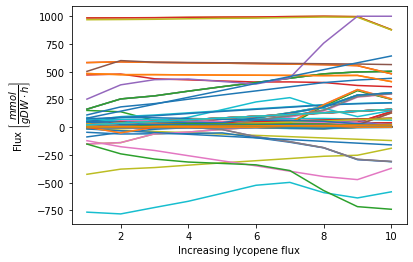

In [71]:
from matplotlib import pyplot as plt

plt.plot(df.T);
plt.xlabel("Increasing lycopene flux");
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$");

## Overexpression targets
Based on what Choi et al. did in $\textit{E. coli}$, it is possible to sort out the potential targets for overexpression. They used the criteria:

$$|v_j^{max}|>|v_j^{initial}| \quad v_j^{max}*v_j^{initial}\geq 0$$

where $v_j$ is the flux of the reaction j, $v_j^{max}$ is the maximal flux and $v_j^{intial}$ is the intial flux, while varying lycopene flux from low to high. Choi et al implemented the overexpression targets in $\textit{E. coli}$ with positive results, ie. the titer increased.

In [75]:
Keys = []
for row in range(len(df[1])):
    if abs(df[1][row])<abs(max(df.T[df.T.keys()[row]])) and df[1][row]*max(df.T[df.T.keys()[row]]):
        Keys.append(df.index[row])

In [76]:
Reactions=df.T[Keys].T.sort_values(by=[10])

In [77]:
Keys=Reactions.index
Reactions

,1,2,3,4,5,6,7,8,9,10
r_2952,0.144727,0.136923,0.238305,0.215917,0.193529,0.171141,0.131155,0.000000,0.000000,0.000000
r_3544,0.115091,0.108885,0.112472,0.101906,0.091339,0.080773,0.395648,0.000000,0.000000,-0.000000
r_2937,0.063956,0.060508,0.055703,0.050470,0.045237,0.040004,0.049622,0.183725,0.137110,-0.000000
r_2379,0.168623,0.159531,0.134632,0.121983,0.109335,0.096687,0.090303,0.256694,0.191903,0.028838
r_2894,0.168623,0.159531,0.146864,0.133067,0.119269,0.105472,0.120718,0.256694,0.191903,0.028838
...,...,...,...,...,...,...,...,...,...,...
flav,81.321500,144.262740,206.834244,269.288855,331.743465,394.198075,456.510785,518.599664,580.601360,641.798639
r_0962,968.537772,970.234228,972.597699,977.215823,980.702646,982.935013,988.157439,992.831334,991.134458,876.514210
r_0893,985.103791,985.907000,987.026017,990.288649,992.419980,993.296857,997.029001,1000.000000,996.517412,879.347344
r_0366,985.103791,985.907000,987.026017,990.288649,992.419980,993.296857,997.029001,1000.000000,996.517412,879.347344


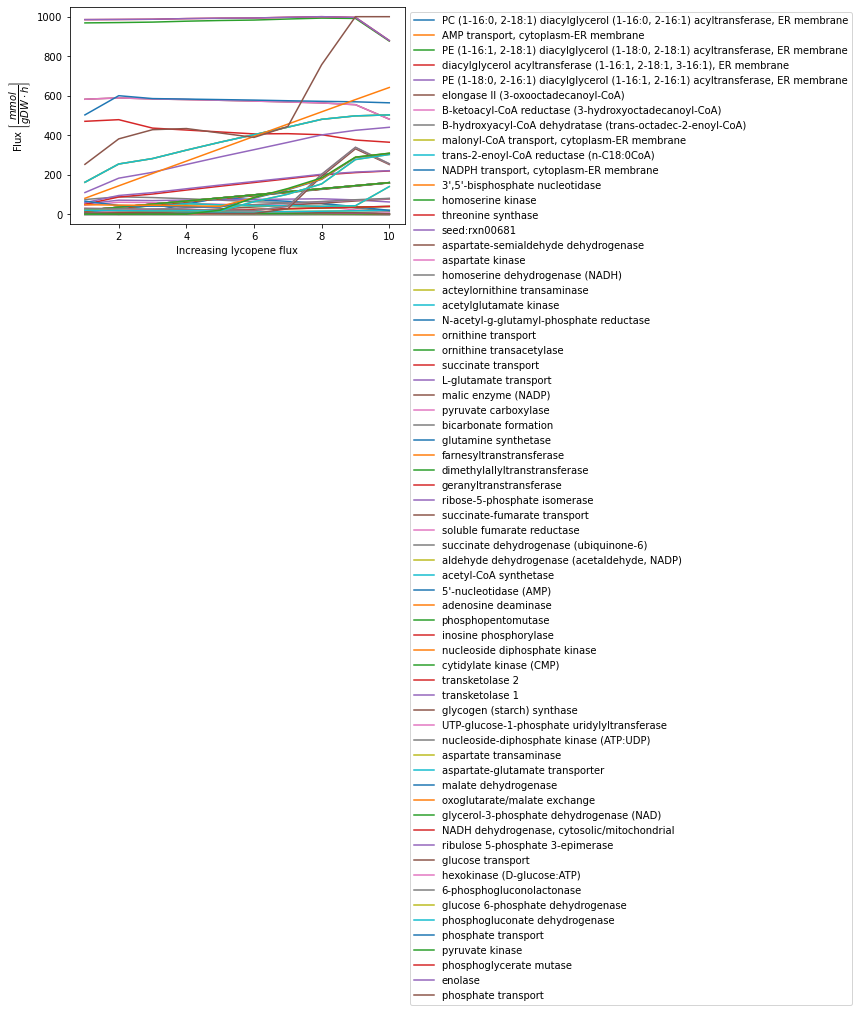

In [78]:
for k in Keys:
    plt.plot(Reactions.T[k],label=model.reactions.get_by_id(k).name)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Increasing lycopene flux");
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$");

These criteria yield a more workable list of reactions.

In [79]:
for id in Reactions.index:
    r=model.reactions.get_by_id(id)
    print(r.name, id+",","final flux:", Reactions.T[id][10])
    s=""
    for rea in range(len(r.reactants)):
        if rea==len(r.reactants)-1:
            s+=r.reactants[rea].name+" ==> "
        else:
            s+=r.reactants[rea].name+" + "
    for p in range(len(r.products)):
        if p==len(r.products)-1:
            s+=r.products[p].name
        else:
            s+=r.products[p].name+" + "
    print(s)
    print()

PC (1-16:0, 2-18:1) diacylglycerol (1-16:0, 2-16:1) acyltransferase, ER membrane r_2952, final flux: 0.0
diglyceride (1-16:0, 2-16:1) [endoplasmic reticulum membrane] + phosphatidylcholine (1-16:0, 2-18:1) [endoplasmic reticulum membrane] ==> triglyceride (1-16:0, 2-16:1, 3-18:1) [endoplasmic reticulum membrane] + 1-acylglycerophosphocholine (16:0) [endoplasmic reticulum membrane]

AMP transport, cytoplasm-ER membrane r_3544, final flux: -0.0
AMP [cytoplasm] ==> AMP [endoplasmic reticulum membrane]

PE (1-16:1, 2-18:1) diacylglycerol (1-18:0, 2-18:1) acyltransferase, ER membrane r_2937, final flux: -0.0
diglyceride (1-18:0, 2-18:1) [endoplasmic reticulum membrane] + phosphatidylethanolamine (1-16:1, 2-18:1) [endoplasmic reticulum membrane] ==> triglyceride (1-18:0, 2-18:1, 3-18:1) [endoplasmic reticulum membrane] + 1-acylglycerophosphoethanolamine (16:1) [endoplasmic reticulum membrane]

diacylglycerol acyltransferase (1-16:1, 2-18:1, 3-16:1), ER membrane r_2379, final flux: 0.028838
p

glycerol-3-phosphate dehydrogenase (NAD) r_0492, final flux: 309.261288
dihydroxyacetone phosphate [mitochondrion] + H+ [mitochondrion] + NADH [mitochondrion] ==> glycerol 3-phosphate [mitochondrion] + NAD [mitochondrion]

NADH dehydrogenase, cytosolic/mitochondrial r_0770, final flux: 364.889221
H+ [cytoplasm] + NADH [cytoplasm] + ubiquinone-6 [mitochondrion] ==> NAD [cytoplasm] + ubiquinol-6 [mitochondrion]

ribulose 5-phosphate 3-epimerase r_0984, final flux: 440.444942
D-ribulose 5-phosphate [cytoplasm] ==> D-xylulose 5-phosphate [cytoplasm]

glucose transport r_1166, final flux: 481.584211
D-glucose [extracellular] ==> D-glucose [cytoplasm]

hexokinase (D-glucose:ATP) r_0534, final flux: 481.584211
ATP [cytoplasm] + D-glucose [cytoplasm] ==> ADP [cytoplasm] + D-glucose 6-phosphate [cytoplasm] + H+ [cytoplasm]

6-phosphogluconolactonase r_0091, final flux: 503.165933
6-O-phosphono-D-glucono-1,5-lactone [cytoplasm] + H2O [cytoplasm] ==> 6-phospho-D-gluconate [cytoplasm] + H+ [cytopl

### References 

1 H. S. Choi, S. Y. Lee, T. Y. Kim, and H. M. Woo, ‘In silico identification of gene amplification targets'

# Model containing both MEP and MVA pathway

**Loading the MVA module that contains the heterologous reactions the generate lycopene from IPP and DMAPP**

In [80]:
model = read_sbml_model('models/yeast_lyco_MVA.xml')

In [81]:
pyruvate = model.metabolites.get_by_id('s_1399[c]')
pyruvate.id = "pyruvate_c"
ppi= model.metabolites.get_by_id('PPi_c')
ppi.id = "ppi_c"
g3p = model.metabolites.get_by_id('s_0764[c]')
g3p.id = "g3p_c"
ctp = model.metabolites.get_by_id('s_0539[c]')
ctp.id = "ctp_c"
atp = model.metabolites.get_by_id('s_0434[c]')
atp.id = "atp_c"
adp = atp = model.metabolites.get_by_id('s_0394[c]')
adp.id = "adp_c"
cmp = model.metabolites.get_by_id('s_0526[c]')
cmp.id = "cmp_c"
co2 = model.metabolites.get_by_id('s_0456[c]')
co2.id = "co2_c"
nadp = model.metabolites.get_by_id('s_1207[c]')
nadp.id = "nadp_c"
nadph = model.metabolites.get_by_id('s_1212[c]')
nadph.id = "nadph_c"
h = model.metabolites.get_by_id('s_0794[c]')
h.id = "h_c"
h2o = model.metabolites.get_by_id('H2O_c')
h2o.id = "h2o_c"
dmapp = model.metabolites.get_by_id('DMAPP')
dmapp.id = "dmapp_c"
ipp = model.metabolites.get_by_id('IPP')
ipp.id = "ipp_c"

**Defining heterologous metabolite intermediates generated in the MEP pathway**  

In [82]:
dxp = Metabolite(id='dxp', compartment = 'c', name='1-Deoxy-D-xylulose 5-phosphate', formula = 'C5H11O7P')
mep = Metabolite(id='mep', compartment = 'c', name='2-C-Methyl-D-erythritol 4-phosphate', formula='C5H13O7P')
dme = Metabolite(id='dme', compartment = 'c', name='4-diphosphocytidyl-2-C-methyl-D-erythritol', formula='C14H23N3O14P2')
pdme = Metabolite(id='pdme', compartment = 'c', name='2-phospho-4-diphosphocytidyl-2-C-methyl-D-erythritol', formula='C14H22N3O17P3')
mec = Metabolite(id='mec', compartment = 'c', name='2-C-methyl-D-erythritol 2,4-cyclodiphosphate', formula='C5H10O9P2')
hmbd = Metabolite(id='hmbd', compartment = 'c', name='1-hydroxy-2-methyl-2-(E)-butenyl 4-diphosphate', formula='C5H9O8P2')
fldr = Metabolite(id='fldr', compartment = 'c', name='reduced_flavodoxin', formula='C17H21N4O9P')
fmn = Metabolite(id='fmn', compartment = 'c', name='oxidized_flavodoxin', formula='C17H19N4O9P')

**Introducing MEP pathway reactions**

In [83]:
dxp_synthase = Reaction('Ec-dxs')
dx_reductoisomerase = Reaction('dxr')
cytidyltransferase = Reaction('ispD')
cm_kinase = Reaction('ispE')
mec_synthase = Reaction('ispF')
hmbpp_synthase = Reaction('ispG')
hmbpp_reductase1 = Reaction('ispH1')
hmbpp_reductase2 = Reaction('ispH2')
flavodoxin_reduction = Reaction('flav')

In [84]:
flavodoxin_reduction.add_metabolites(({nadph: -2,
                             fmn: -1,
                             fldr: 1,
                             nadp: 2
                             }))

In [85]:
dxp_synthase.add_metabolites(({pyruvate: -1,
                             g3p: -1,
                             h: -1,
                             dxp: 1,
                             co2: 1
                             }))

In [86]:
dx_reductoisomerase.add_metabolites(({dxp: -1,
                               nadph: -1,
                               h: -1,
                               mep: 1,
                               nadp: 1
                              }))

In [87]:
cytidyltransferase.add_metabolites(({mep: -1,
                                     ctp: -1,
                                     h: -1,
                                    dme: 1,
                                    ppi: 1
                                   }))

In [88]:
cm_kinase.add_metabolites(({dme: -1,
                            atp: -1,
                            h: 1,
                            pdme: 1,
                            adp: 1
                            }))

In [89]:
mec_synthase.add_metabolites(({pdme: -1,
                               cmp: 1,
                               mec: 1
                                   }))

In [90]:
hmbpp_synthase.add_metabolites(({mec: -1,
                             fldr: -2,
                             h2o: 1,
                             fmn: 2,
                             hmbd: 1
                             }))

In [91]:
hmbpp_reductase1.add_metabolites(({hmbd: -1,
                             fldr: -2,
                             h2o: 1,
                             dmapp: 1,
                             fmn: 2
                             }))

In [92]:
hmbpp_reductase2.add_metabolites(({hmbd: -1,
                             fldr: -2,
                             h2o: 1,
                             dmapp: 1,
                             fmn: 2
                             }))

In [93]:
model.add_reactions([dxp_synthase])
model.add_reactions([dx_reductoisomerase])
model.add_reactions([cytidyltransferase])
model.add_reactions([cm_kinase])
model.add_reactions([mec_synthase])
model.add_reactions([hmbpp_synthase])
model.add_reactions([hmbpp_reductase1])
model.add_reactions([hmbpp_reductase2])
model.add_reactions([flavodoxin_reduction])

### **Understanding the effects of increased glucose levels on lycopene production when both MEP and MVA pathways are active**

In [94]:
medium_glc_ex = model.reactions.get_by_id('r_1714')
medium = model.medium
with model:
    model.objective = model.reactions.CrtI
    lycopene_production = model.optimize().objective_value
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print('Maximum theoretical productivity of lycopene =', lycopene_production, 'mmol/(gDW*h^-1)')
    
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = lycopene_production / (-1*glc_uptake_flux)
    print('Maximum theoretical yield =', max_yield, 'mmol-lyco/mmol-glc\n')
    
    medium[medium_glc_ex.id] = 700
    model.medium = medium

    lycopene_production = model.optimize().objective_value
    glc_uptake_flux = model.reactions.r_1714.flux
    max_yield = lycopene_production / (-1*glc_uptake_flux)
    print("At glucose concentration = {}:".format(medium[medium_glc_ex.id]))
    print('Maximum theoretical productivity of lycopene =', lycopene_production, 'mmol/(gDW*h*^-1)')
    print('Maximum theoretical yield =', max_yield, 'mmol-lyco/mmol-glc\n')

At glucose concentration = 700.0:
Maximum theoretical productivity of lycopene = 29.19164691943128 mmol/(gDW*h^-1)
Maximum theoretical yield = 0.060087935408025164 mmol-lyco/mmol-glc

At glucose concentration = 700:
Maximum theoretical productivity of lycopene = 29.19164691943128 mmol/(gDW*h*^-1)
Maximum theoretical yield = 0.060087935408025164 mmol-lyco/mmol-glc



In [95]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [96]:
# Renaming IDs for exchange reactions needed
glc_exchange = model.reactions.r_1714
o2_exchange = model.reactions.r_1992
growth = model.reactions.r_2111

In [97]:
medium = model.medium

#Amping glucose levels to 700.0
medium['r_1714'] = 700
model.reactions.r_1714.bounds = -700, 0

In [98]:
ppp_biomass = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=growth)
ppp_biomass

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.0,0.0,18.990886,0.0,0.0,-700.000000
1,r_1714,0.0,0.0,0.0,19.452775,0.0,0.0,-663.159690
2,r_1714,0.0,0.0,0.0,19.912989,0.0,0.0,-626.319379
3,r_1714,0.0,0.0,0.0,20.373202,0.0,0.0,-589.479069
4,r_1714,0.0,0.0,0.0,20.093125,0.0,0.0,-552.638759
5,r_1714,0.0,0.0,0.0,19.370882,0.0,0.0,-515.798448
6,r_1714,0.0,0.0,0.0,18.584036,0.0,0.0,-478.958138
7,r_1714,0.0,0.0,0.0,17.797189,0.0,0.0,-442.117828
8,r_1714,0.0,0.0,0.0,17.010343,0.0,0.0,-405.277518
9,r_1714,0.0,0.0,0.0,16.223496,0.0,0.0,-368.437207


<AxesSubplot:xlabel='Glucose uptake [-mmol/gDW/h]', ylabel='Biomass objective'>

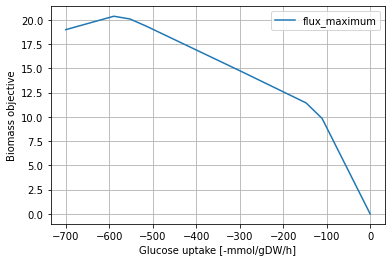

In [99]:
ppp_biomass.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Biomass objective", grid = True)

Can see that biomass is maximized when glucose uptake is at 578 mmol/gDW/h

In [100]:
ppp_lycopene = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=model.reactions.CrtI)
ppp_lycopene

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,1.089993e-16,NaN,29.191647,1.028658e+00,NaN,-700.000000
1,r_1714,0.0,0.000000e+00,NaN,29.191647,1.085803e+00,NaN,-663.159690
2,r_1714,0.0,0.000000e+00,NaN,29.191647,1.149670e+00,NaN,-626.319379
3,r_1714,0.0,0.000000e+00,NaN,29.191647,1.221520e+00,NaN,-589.479069
4,r_1714,0.0,0.000000e+00,NaN,29.191647,1.302950e+00,NaN,-552.638759
5,r_1714,0.0,0.000000e+00,NaN,29.191647,1.396012e+00,NaN,-515.798448
6,r_1714,0.0,0.000000e+00,NaN,29.121074,1.499755e+00,NaN,-478.958138
7,r_1714,0.0,0.000000e+00,NaN,28.709956,1.601788e+00,NaN,-442.117828
8,r_1714,0.0,0.000000e+00,NaN,28.291316,1.721913e+00,NaN,-405.277518
9,r_1714,0.0,0.000000e+00,NaN,27.872677,1.866060e+00,NaN,-368.437207


<AxesSubplot:xlabel='Glucose uptake [-mmol/gDW/h]', ylabel='Lycopene objective'>

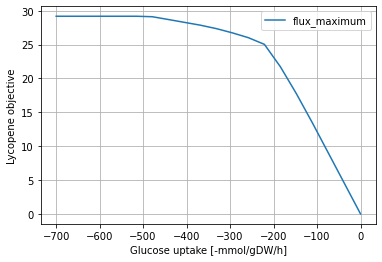

In [101]:
ppp_lycopene.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Lycopene objective", grid=True)

Lycopene production is maximized at around a glucose uptake of 300 mmol/gDW/h

In [102]:
ppp_lyco_vs_o2 = production_envelope(model,
                    reactions=[o2_exchange],
                    objective=model.reactions.CrtI)
ppp_lyco_vs_o2

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1992
0,r_1714,0.0,0.0,NaN,12.949504,0.756963,NaN,-1000.000000
1,r_1714,0.0,0.0,NaN,14.482138,0.828705,NaN,-947.368421
2,r_1714,0.0,0.0,NaN,16.014772,0.897483,NaN,-894.736842
3,r_1714,0.0,0.0,NaN,17.547405,0.963478,NaN,-842.105263
4,r_1714,0.0,0.0,NaN,19.080039,1.026856,NaN,-789.473684
5,r_1714,0.0,0.0,NaN,20.583438,1.088902,NaN,-736.842105
6,r_1714,0.0,0.0,NaN,21.951104,1.154791,NaN,-684.210526
7,r_1714,0.0,0.0,NaN,23.318771,1.219951,NaN,-631.578947
8,r_1714,0.0,0.0,NaN,24.627355,1.281852,NaN,-578.947368
9,r_1714,0.0,0.0,NaN,25.726429,1.284729,NaN,-526.315789


<AxesSubplot:xlabel='Oxygen uptake rate', ylabel='Lycopene objective'>

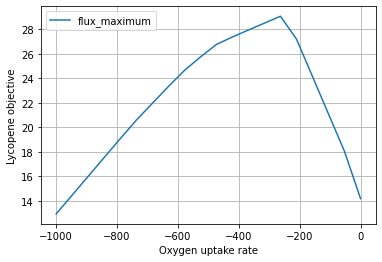

In [103]:
ppp_lyco_vs_o2.plot(x='r_1992', y='flux_maximum', xlabel="Oxygen uptake rate", ylabel="Lycopene objective", grid=True)

In [104]:
ppp_o2 = production_envelope(model,
                            reactions=[o2_exchange],
                            objective=growth)
ppp_o2

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1992
0,r_1714,0.0,0.0,0.0,9.531888,0.0,0.0,-1000.000000
1,r_1714,0.0,0.0,0.0,10.598988,0.0,0.0,-947.368421
2,r_1714,0.0,0.0,0.0,11.666088,0.0,0.0,-894.736842
3,r_1714,0.0,0.0,0.0,12.733188,0.0,0.0,-842.105263
4,r_1714,0.0,0.0,0.0,13.800288,0.0,0.0,-789.473684
5,r_1714,0.0,0.0,0.0,14.867389,0.0,0.0,-736.842105
6,r_1714,0.0,0.0,0.0,15.934489,0.0,0.0,-684.210526
7,r_1714,0.0,0.0,0.0,17.001589,0.0,0.0,-631.578947
8,r_1714,0.0,0.0,0.0,18.068689,0.0,0.0,-578.947368
9,r_1714,0.0,0.0,0.0,19.135789,0.0,0.0,-526.315789


In [105]:
max_biomass_glc = ppp_biomass['flux_maximum'].max()
max_biomass_o2 = ppp_o2['flux_maximum'].max()
max_lycopene_glc = ppp_lycopene['flux_maximum'].max()
max_lycopene_o2 = ppp_lyco_vs_o2['flux_maximum'].max()
max_list = [max_biomass_glc, max_biomass_o2, max_lycopene_glc, max_lycopene_o2]

In [106]:
print("Maxima:\n",
     "Maximum flux towards biomass vs. glucose uptake = ", max_list[0],
     "\nMaximum flux towards biomass vs. O2 uptake = ", max_list[1],
     "\nMaximum flux towards lycopene vs. glucose uptake = ", max_list[2],
     "\nMaximum flux towards lycopene vs. O2 uptake= ", max_list[3], sep='')

Maxima:
Maximum flux towards biomass vs. glucose uptake = 20.373202063464635
Maximum flux towards biomass vs. O2 uptake = 20.370947904443558
Maximum flux towards lycopene vs. glucose uptake = 29.1916469194313
Maximum flux towards lycopene vs. O2 uptake= 29.0513376153654


In [107]:
# Finding row index for maximum values
glc_max_pos = ppp_biomass['flux_maximum'].idxmax()
o2_max_pos = ppp_o2['flux_maximum'].idxmax()
lycovsglc_max_pos = ppp_lycopene['flux_maximum'].idxmax()
lycovso2_max_pos = ppp_lyco_vs_o2['flux_maximum'].idxmax()

print('Uptake rates/fluxes:',
     "\nOptimal glucose uptake for maximum flux towards biomass:", ppp_biomass['r_1714'][glc_max_pos],
      "\nOptimal oxygen uptake for maximum flux towards biomass:", ppp_o2['r_1992'][o2_max_pos],
    "\nOptimal glucose uptake for maximum flux towards lycopene:", ppp_lycopene['r_1714'][lycovsglc_max_pos],
      "\nOptimal oxygen uptake for maximum flux towards lycopene:", ppp_lyco_vs_o2['r_1992'][lycovso2_max_pos]
     )

Uptake rates/fluxes: 
Optimal glucose uptake for maximum flux towards biomass: -589.4790690836485 
Optimal oxygen uptake for maximum flux towards biomass: -263.1578947368422 
Optimal glucose uptake for maximum flux towards lycopene: -700.0 
Optimal oxygen uptake for maximum flux towards lycopene: -263.1578947368422


In [108]:
write_sbml_model(model,"models/MEP_MVA_together.xml")

### Over expression and down regulation targets for lycopene production (MEP and MVA pathways)

In [109]:
model = read_sbml_model('models/MEP_MVA_together.xml')
medium=model.medium

In [110]:
fseof = FSEOF(model)

Here we use the FSEOF algorithm to identify the reactions affected by varied lycopene flux 

In [111]:
sol=fseof.run(target=model.reactions.get_by_id("CrtI"))
df=sol.data_frame;

There are 219 reaction fluxes affected as visualized below. Many of these are not valuable targets for gene manipulation and in the following sections we will try to extract the most obvious candidates.

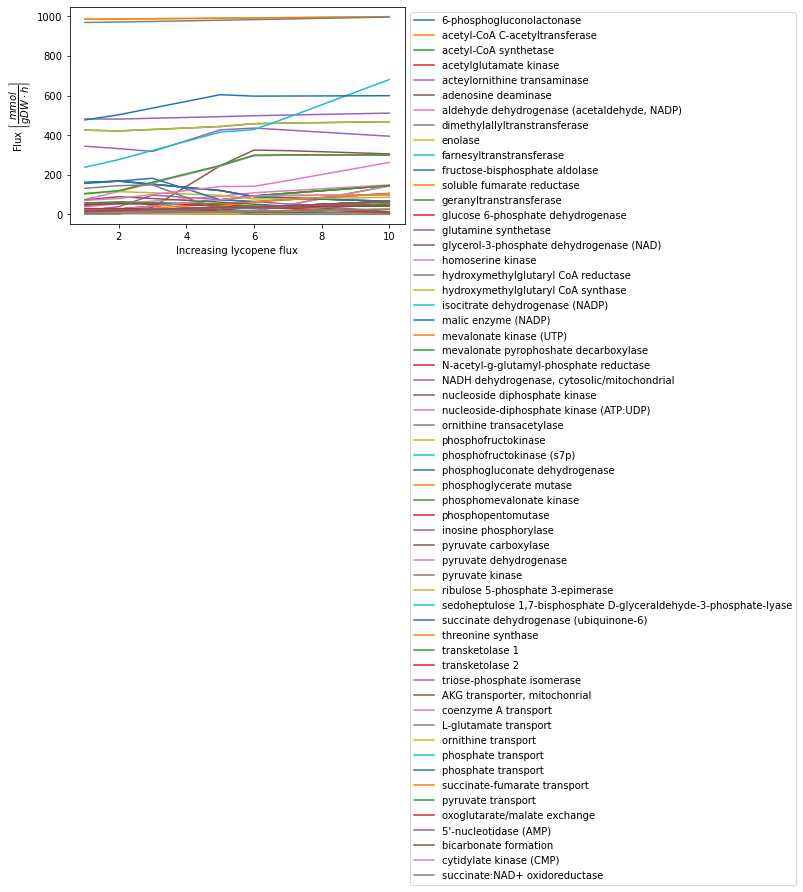

In [125]:
from matplotlib import pyplot as plt

Keys = []
for row in range(len(df[1])):
        if df[1][row]==0.0:
            continue
        elif df[1][row]>df[10][row] and abs(df[1][row]-df[10][row])/abs(df[1][row])>0.5 and df[1][row]-df[10][row]>0.1:
            Keys.append(df.index[row])
Reactions=df.T[Keys].T.sort_values(by=[10])
Reactions

for k in Keys:
    plt.plot(Reactions.T[k],label=model.reactions.get_by_id(k).name)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Increasing lycopene flux");
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$");


#plt.plot(df.T);
#plt.xlabel("Increasing lycopene flux");
#plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$");

## Overexpression targets
Using the same method as before

In [122]:
Keys = []
for row in range(len(df[1])):
    if abs(df[1][row])<abs(max(df.T[df.T.keys()[row]])) and df[1][row]*max(df.T[df.T.keys()[row]]):
        Keys.append(df.index[row])

In [123]:
Reactions=df.T[Keys].T.sort_values(by=[10])

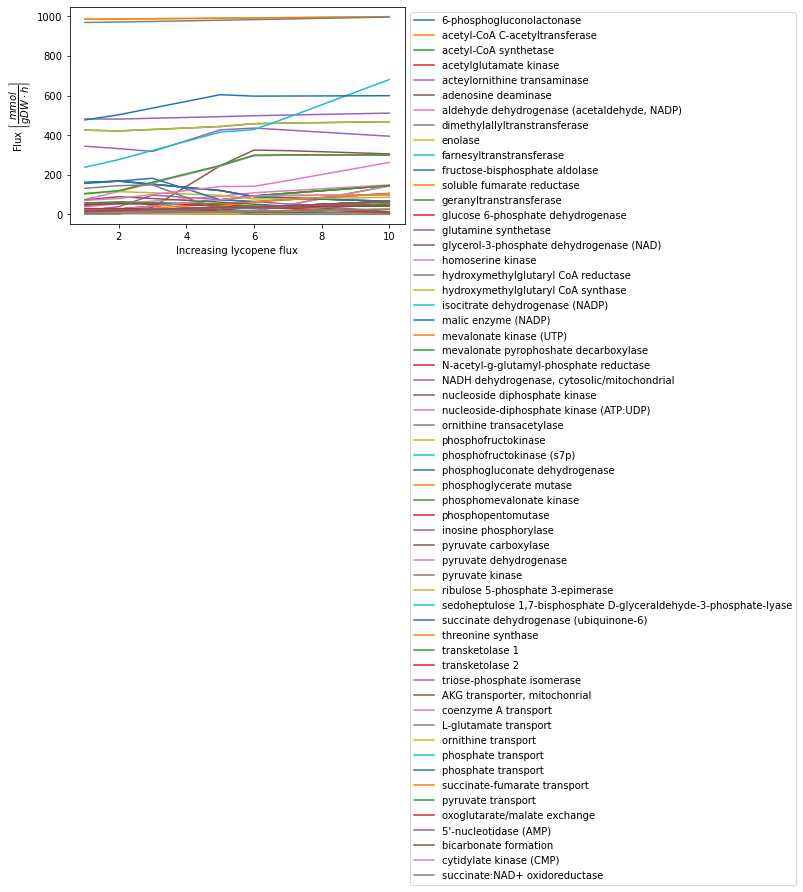

In [124]:
for k in Keys:
    plt.plot(Reactions.T[k],label=model.reactions.get_by_id(k).name)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Increasing lycopene flux");
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$");

These criteria yield a more workable list of reactions.

In [121]:
for id in Reactions.index:
    r=model.reactions.get_by_id(id)
    print(r.name, id+",","final flux:", Reactions.T[id][10])
    s=""
    for rea in range(len(r.reactants)):
        if rea==len(r.reactants)-1:
            s+=r.reactants[rea].name+" ==> "
        else:
            s+=r.reactants[rea].name+" + "
    for p in range(len(r.products)):
        if p==len(r.products)-1:
            s+=r.products[p].name
        else:
            s+=r.products[p].name+" + "
    print(s)
    print()

Pyrophosphate transport in via proton symport r_4460, final flux: -438.155167
H+ [extracellular] + diphosphate [extracellular] ==> diphosphate [cytoplasm] + H+ [cytoplasm]

glycerol-3-phosphate shuttle r_1809, final flux: -305.344377
glycerol 3-phosphate [cytoplasm] ==> glycerol 3-phosphate [mitochondrion]

dihydroxyacetone phosphate transport r_1746, final flux: -305.344377
dihydroxyacetone phosphate [mitochondrion] ==> dihydroxyacetone phosphate [cytoplasm]

CO2 transport r_1696, final flux: -304.632228
carbon dioxide [cytoplasm] ==> carbon dioxide [mitochondrion]

hydroxymethylglutaryl-CoA transport r_1840, final flux: -98.575166
3-hydroxy-3-methylglutaryl-CoA [cytoplasm] ==> 3-hydroxy-3-methylglutaryl-CoA [mitochondrion]

hypoxanthine transport r_1842, final flux: -65.060533
hypoxanthine [extracellular] ==> hypoxanthine [cytoplasm]

L-Alanine:2-oxoglutarate aminotransferase r_4226, final flux: -1.54264
2-oxoglutarate [cytoplasm] + L-alanine [cytoplasm] ==> L-glutamate [cytoplasm] +